In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns = df.columns.str.lower()
df.isnull().sum(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(passengerid      0
 survived         0
 pclass           0
 name             0
 sex              0
 age            177
 sibsp            0
 parch            0
 ticket           0
 fare             0
 cabin          687
 embarked         2
 dtype: int64,
 None)

# EDA (Exploratory Data Analysis) 

## Survived

In [5]:
print("Survived mean:",df.survived.mean())

Survived mean: 0.3838383838383838


<Axes: xlabel='survived', ylabel='count'>

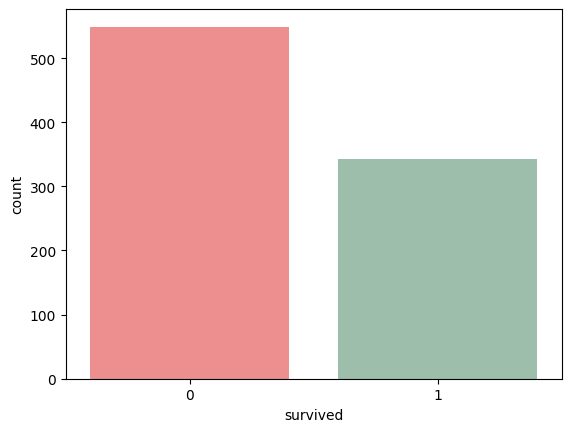

In [6]:
sns.countplot(data=df, x="survived", palette=['r', 'seagreen'], alpha= 0.5)

## Age

<Axes: xlabel='survived'>

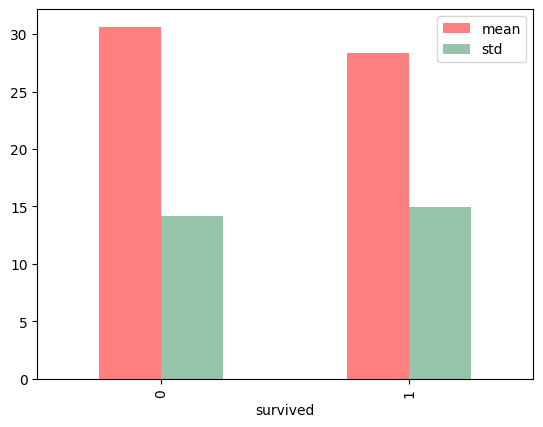

In [7]:
df.groupby("survived")["age"].agg(["mean","std"]).plot(kind="bar", alpha=0.5, color=['red',"seagreen"])

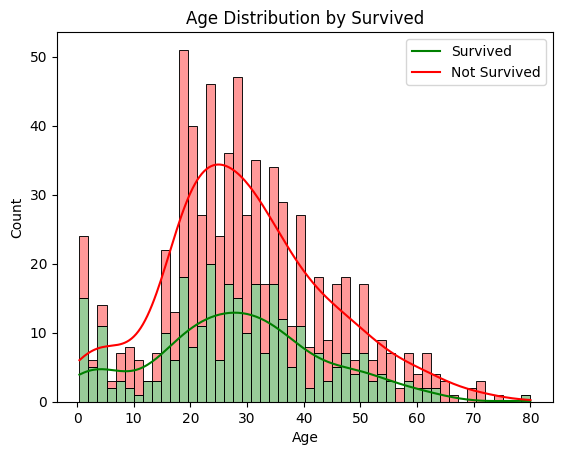

In [8]:
sns.histplot(data=df, x='age', hue='survived', bins=50, alpha=0.4, palette=['red', 'green'], multiple='stack', kde=True)

plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Survived','Not Survived'])
plt.show()

## Gender

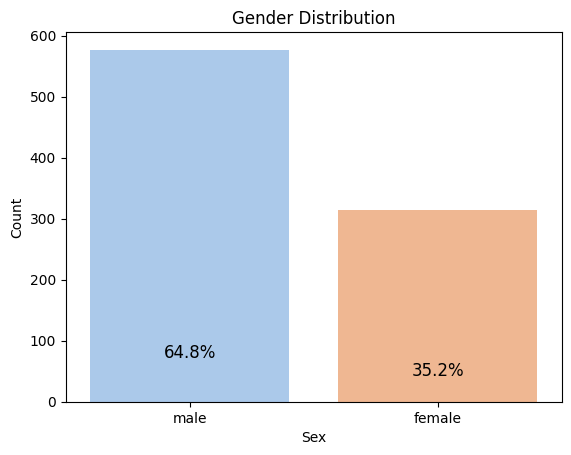

In [9]:
sex_counts = df['sex'].value_counts(normalize=True) * 100

ax = sns.countplot(data=df, x="sex", palette='pastel')

total = df['sex'].count()
for i in range(len(sex_counts)):
    count = sex_counts[i]
    pct_string = f'{count:.1f}%'
    ax.text(i, count + 1, pct_string, ha='center', va='bottom', fontsize=12)

plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [10]:
sex_counts = df.groupby("sex")["survived"].value_counts(normalize=True).rename('proportion') * 100
sex_counts = pd.DataFrame(sex_counts).sort_values(by=["sex","survived"])

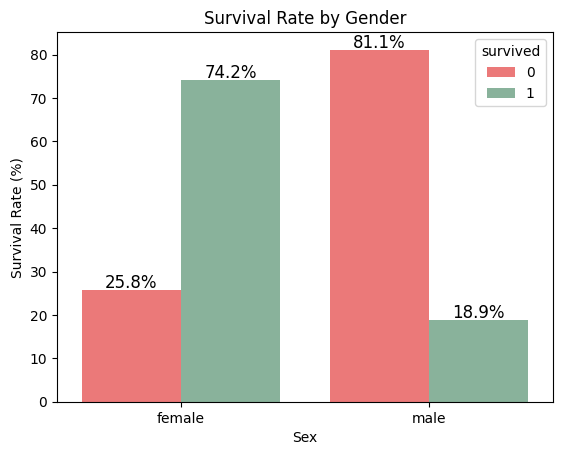

In [11]:
ax = sns.barplot(data=sex_counts.reset_index(), x='sex', y='proportion', hue='survived', palette=['r', 'seagreen'], alpha=0.6)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.show()

## Spouses aboard the Titanic

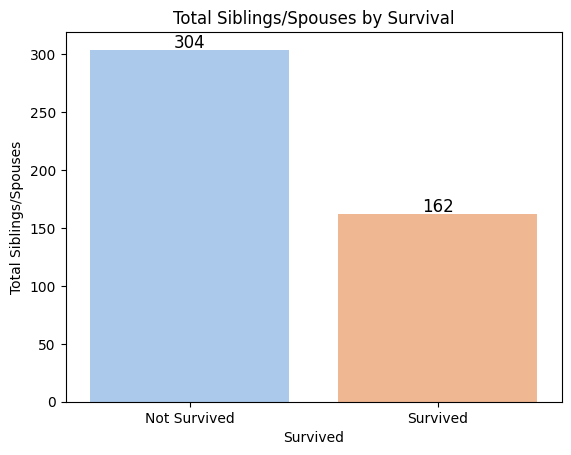

In [12]:
sibsp_sum = df.groupby("survived")["sibsp"].sum()

ax = sns.barplot(x=sibsp_sum.index, y=sibsp_sum.values, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Total Siblings/Spouses by Survival')
plt.xlabel('Survived')
plt.ylabel('Total Siblings/Spouses')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


## Children aboard the Titanic

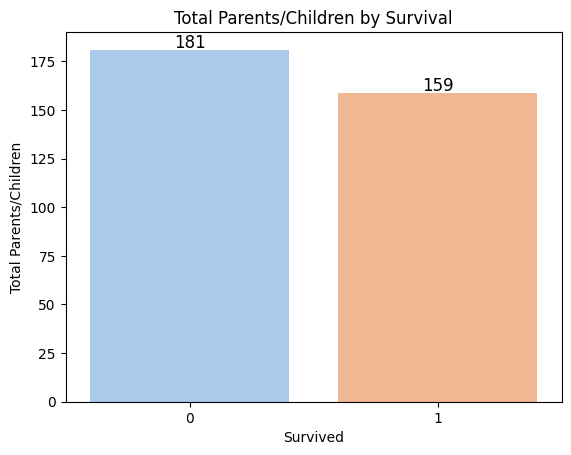

In [13]:
parch = df.groupby("survived")["parch"].sum()

ax = sns.barplot(x=parch.index, y=parch.values, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Total Parents/Children by Survival')
plt.xlabel('Survived')
plt.ylabel('Total Parents/Children')
plt.show()

## Ticket Class

In [14]:
pclass = df.groupby("pclass")[["survived","age"]].agg(["sum", "mean"]).sort_values(by=["pclass"])
pclass

survived                age           
            sum      mean      sum       mean
pclass                                       
1           136  0.629630  7111.42  38.233441
2            87  0.472826  5168.83  29.877630
3           119  0.242363  8924.92  25.140620

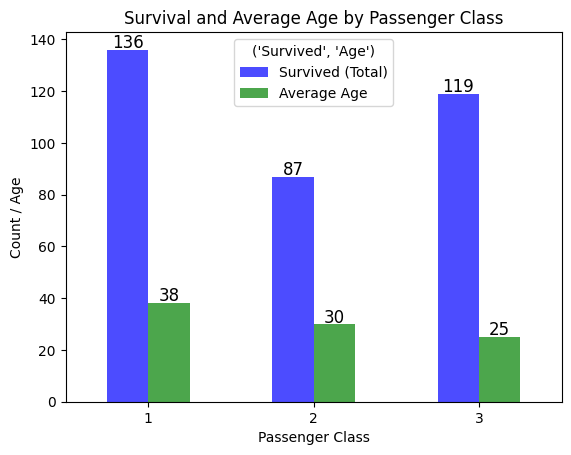

In [15]:
ax = pclass.plot(kind='bar', y=[('survived', 'sum'), ('age', 'mean')], color=['blue', 'green'], alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Survival and Average Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count / Age')
plt.xticks(rotation=0)
plt.legend(title=('Survived', 'Age'), labels=['Survived (Total)', 'Average Age'])
plt.show()

## Port of Embarkation

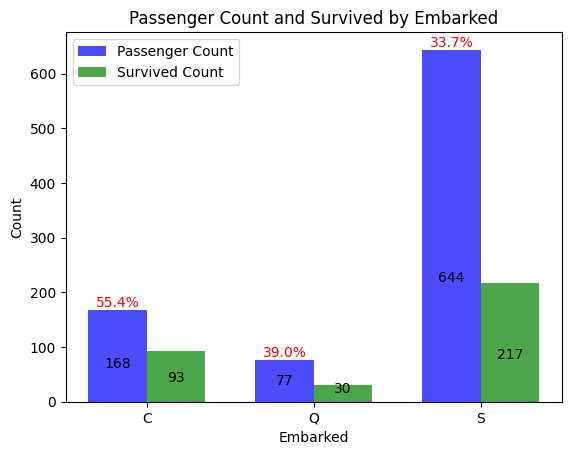

In [16]:
embarked_survived = df.groupby("embarked")["survived"].sum().sort_index()
embarked_counts = df['embarked'].value_counts().sort_index()
embarked_ratio = embarked_survived / embarked_counts * 100



bar_width = 0.35
x = range(len(embarked_counts))

passenger_bars = plt.bar(x, embarked_counts.values, width=bar_width, color='blue', alpha=0.7, label='Passenger Count')
survived_bars = plt.bar([i + bar_width for i in x], embarked_survived.values, width=bar_width, color='green', alpha=0.7, label='Survived Count')

for bars in [passenger_bars, survived_bars]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height()/3, f'{int(bar.get_height()):d}',
                 ha='center', va='bottom', fontsize=10)


for i, ratio in enumerate(embarked_ratio):
    plt.text(passenger_bars[i].get_x() + passenger_bars[i].get_width() / 2., passenger_bars[i].get_height(), f'{ratio:.1f}%',
             ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Passenger Count and Survived by Embarked')
plt.xticks([i + bar_width / 2 for i in x], embarked_counts.index)
plt.legend()

plt.show()

## Statistical Relationships

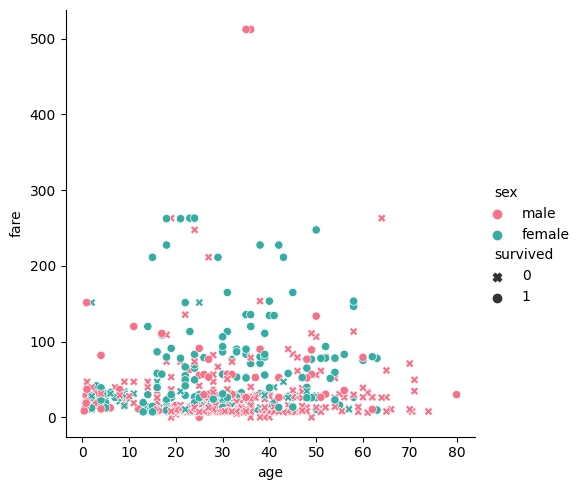

In [17]:
markers = {0: "X", 1: "o"}
sns.relplot(data=df, x="age", y="fare", hue="sex", style="survived", markers=markers,  palette="husl")

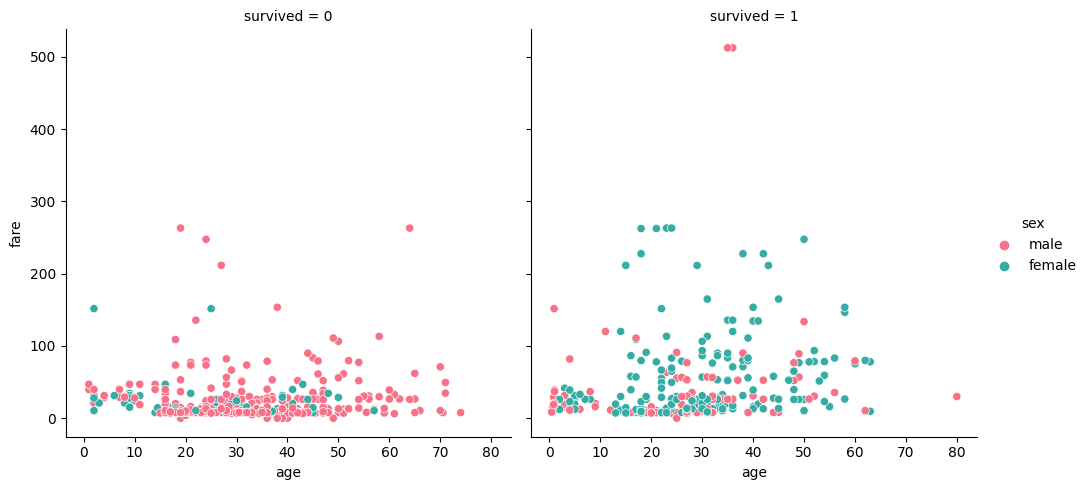

In [18]:
sns.relplot(data=df, x="age", y="fare", hue="sex", col="survived",  palette="husl")

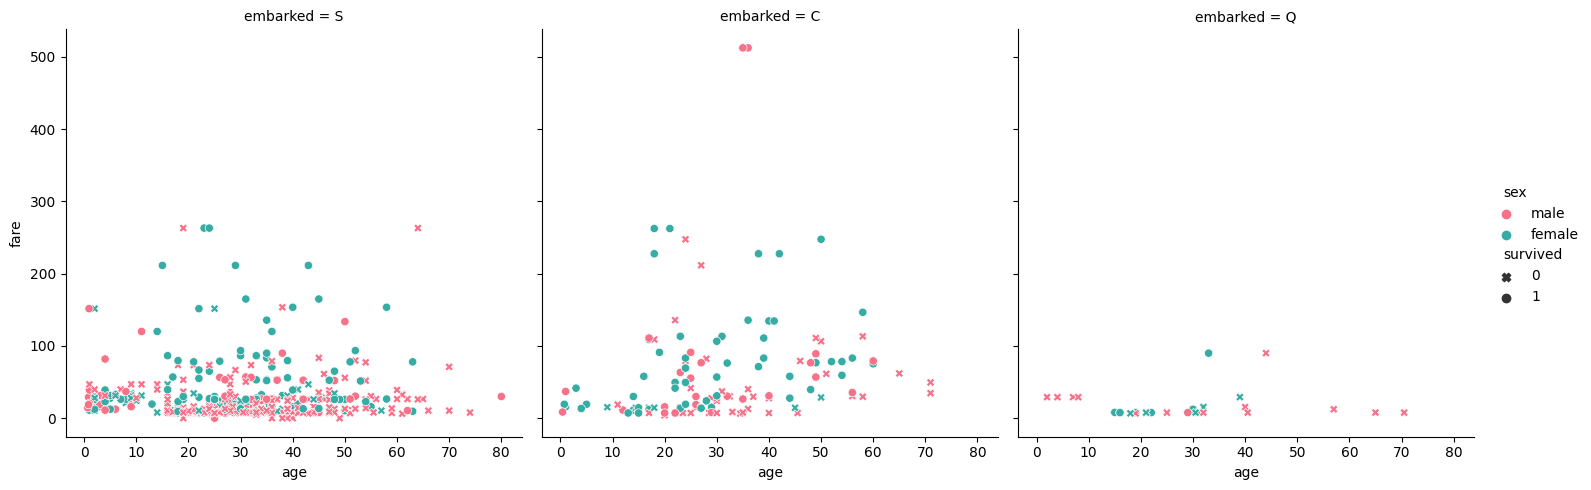

In [19]:
sns.relplot(data=df, x="age", y="fare", hue="sex", markers=markers, col="embarked", style="survived", palette="husl")

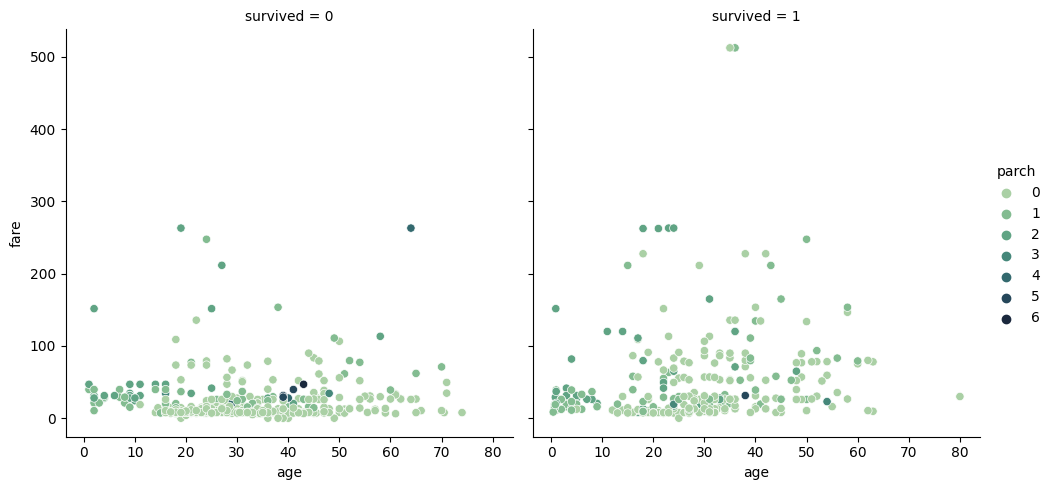

In [20]:
sns.relplot(data=df, x="age", y="fare", hue="parch",col="survived",palette="ch:r=-.5,l=.75", markers=markers)

In [21]:
df["age"] = df["age"].fillna(df["age"].mean(), inplace=False)
age_bins = [df.age.min(), 18, 35, 60, df.age.max()]
age_labels = ['child', 'youth', 'adult', 'Elderly']
df_ = df.copy()
df_['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

<Axes: >

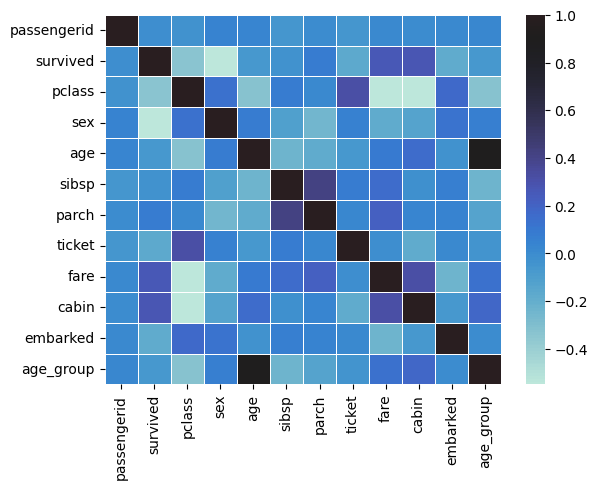

In [22]:
df_corr = df_.drop("name",axis=1)
df_corr[["cabin","embarked","sex","ticket","age_group"]] = df_corr[["cabin","embarked","sex","ticket","age_group"]].astype("category").apply(lambda x: x.cat.codes)
sns.heatmap(data=df_corr.corr() ,linewidths=0.5, center=0.9)

# Feature Engineering

In [23]:
# Age
df["age"] = df["age"].fillna(df["age"].mean(), inplace=False)
age_bins = [df.age.min(), 18, 35, 60, df.age.max()]
age_labels = ['child', 'youth', 'adult', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Family
df['family_size'] = df['sibsp'] + df['parch'] + 1 

# object to numeric for feeding the model
df[["cabin","embarked","sex","ticket","age_group"]] = df[["cabin","embarked","sex","ticket","age_group"]].astype("category").apply(lambda x: x.cat.codes)
X = df[["pclass", "sex","sibsp", "parch", "ticket", "fare","cabin", "embarked", "age_group"]]
y = df["survived"]

# Building Model

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

now,  The variables is ready for modelling 
 

## DecisionTreeClassifier

The criterion used in this model is the entropy coefficient

In [25]:
from sklearn.tree import DecisionTreeClassifier

DecTreeClass = DecisionTreeClassifier(
    criterion= "entropy", #The function to measure the quality of a split. 
    splitter = "best",  #The strategy used to choose the split at each node.
    max_depth= None,   #The maximum depth of the tree.
    random_state=42,
)

DecTreeClass.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
from sklearn.metrics  import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

pred_survival = DecTreeClass.predict(X_test)

print(confusion_matrix(y_test, pred_survival), '\n')

accuracy  = accuracy_score(y_test, pred_survival)
precision = recall_score(y_test, pred_survival)
recall    = precision_score(y_test, pred_survival)
roc_auc   = roc_auc_score(y_test, pred_survival)


print("%0.3f accuracy  " % (accuracy))
print("%0.3f recall    " % (recall))
print("%0.3f precision " % (precision))
print("%0.3f roc_auc   " % (roc_auc))

[[87 18]
 [19 55]] 

0.793 accuracy  
0.753 recall    
0.743 precision 
0.786 roc_auc   


The model has been retrained with cross-validation.
For more about cross-validation, see: [sklearn.com/cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [27]:
from sklearn.model_selection import cross_val_score

DecTreeClass_cv = DecisionTreeClassifier(
    criterion= "entropy", #The function to measure the quality of a split. 
    splitter = "best",    #The strategy used to choose the split at each node.
    max_depth= None,      #The maximum depth of the tree.
    random_state=42,
)

DecTreeClass_cv.fit(X_test, y_test)

accuracy  = cross_val_score(DecTreeClass_cv, X_test, y_test, cv=5, scoring="accuracy")
precision = cross_val_score(DecTreeClass_cv, X_test, y_test, cv=5, scoring="precision")
recall    = cross_val_score(DecTreeClass_cv, X_test, y_test, cv=5, scoring="recall")
roc_auc   = cross_val_score(DecTreeClass_cv, X_test, y_test, cv=5, scoring="roc_auc")


print("%0.3f accuracy  with a standard deviation of %0.3f" % (accuracy.mean(), accuracy.std()))
print("%0.3f recall    with a standard deviation of %0.3f" % (recall.mean(), recall.std()))
print("%0.3f precision with a standard deviation of %0.3f" % (precision.mean(), precision.std()))
print("%0.3f roc_auc   with a standard deviation of %0.3f" % (roc_auc.mean(), roc_auc.std()))

0.749 accuracy  with a standard deviation of 0.049
0.770 recall    with a standard deviation of 0.090
0.673 precision with a standard deviation of 0.052
0.752 roc_auc   with a standard deviation of 0.051


We have prevented overfitting in the model. Now, let's try to achieve better score values by experimenting with different values for the decision tree parameters. To do this, we will use GridSearchCV from the sklearn library.

### Hyperparameter optimization
#### GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'min_weight_fraction_leaf': [0, 0.1, 0.2],
    'random_state': [42]
} 

DecTreeClass_Gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy', 
    cv=10,
    n_jobs=-1,
    verbose=1
)

DecTreeClass_Gs.fit(X_train, y_train)

print("Best parameters found: ", DecTreeClass_Gs.best_params_)
print("Best accuracy: %0.3f" % DecTreeClass_Gs.best_score_)

best_model = DecTreeClass_Gs.best_estimator_

accuracy  = cross_val_score(best_model, X_test, y_test,   cv=5, scoring="accuracy")
precision = cross_val_score(best_model, X_test, y_test,   cv=5, scoring="precision")
recall    = cross_val_score(best_model,   X_test, y_test, cv=5, scoring="recall")
roc_auc   = cross_val_score(best_model,   X_test, y_test, cv=5, scoring="roc_auc")

print("%0.3f accuracy  with a standard deviation of %0.3f" % (accuracy.mean(), accuracy.std()))
print("%0.3f recall    with a standard deviation of %0.3f" % (recall.mean(), recall.std()))
print("%0.3f precision with a standard deviation of %0.3f" % (precision.mean(), precision.std()))
print("%0.3f roc_auc   with a standard deviation of %0.3f" % (roc_auc.mean(), roc_auc.std()))


dt_recall    = recall.copy()
dt_precision = precision.copy()
dt_accuracy  = accuracy.copy()

Fitting 10 folds for each of 4032 candidates, totalling 40320 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'random_state': 42, 'splitter': 'best'}
Best accuracy: 0.823
0.788 accuracy  with a standard deviation of 0.047
0.663 recall    with a standard deviation of 0.070
0.797 precision with a standard deviation of 0.076
0.834 roc_auc   with a standard deviation of 0.048


The scores look better than before.\
 Now, let's visualize the feature importances and the newly formed decision tree.

#### RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'min_weight_fraction_leaf': [0, 0.1, 0.2],
    'random_state': [42]
}

# RandomizedSearchCV'yi kullanarak en iyi parametreleri bul
DecTreeClass_Rs = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=100,  # Denenecek kombinasyon sayısı
    scoring='accuracy', 
    cv=10,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

DecTreeClass_Rs.fit(X_train, y_train)

print("Best parameters found: ", DecTreeClass_Rs.best_params_)
print("Best accuracy: %0.3f" % DecTreeClass_Rs.best_score_)

best_model = DecTreeClass_Rs.best_estimator_

accuracy  = cross_val_score(best_model, X_test, y_test, cv=5, scoring="accuracy")
precision = cross_val_score(best_model, X_test, y_test, cv=5, scoring="precision")
recall    = cross_val_score(best_model, X_test, y_test, cv=5, scoring="recall")
roc_auc   = cross_val_score(best_model, X_test, y_test, cv=5, scoring="roc_auc")

print("%0.3f accuracy  with a standard deviation of %0.3f" % (accuracy.mean(), accuracy.std()))
print("%0.3f recall    with a standard deviation of %0.3f" % (recall.mean(), recall.std()))
print("%0.3f precision with a standard deviation of %0.3f" % (precision.mean(), precision.std()))
print("%0.3f roc_auc   with a standard deviation of %0.3f" % (roc_auc.mean(), roc_auc.std()))

dt_recall    = recall.copy()
dt_precision = precision.copy()
dt_accuracy  = accuracy.copy()


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found:  {'splitter': 'best', 'random_state': 42, 'min_weight_fraction_leaf': 0, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Best accuracy: 0.822
0.794 accuracy  with a standard deviation of 0.044
0.703 recall    with a standard deviation of 0.030
0.785 precision with a standard deviation of 0.082
0.843 roc_auc   with a standard deviation of 0.057



The scores look better than before.\
Now, let's visualize the feature importances and the newly formed decision tree.


<Figure size 640x480 with 0 Axes>

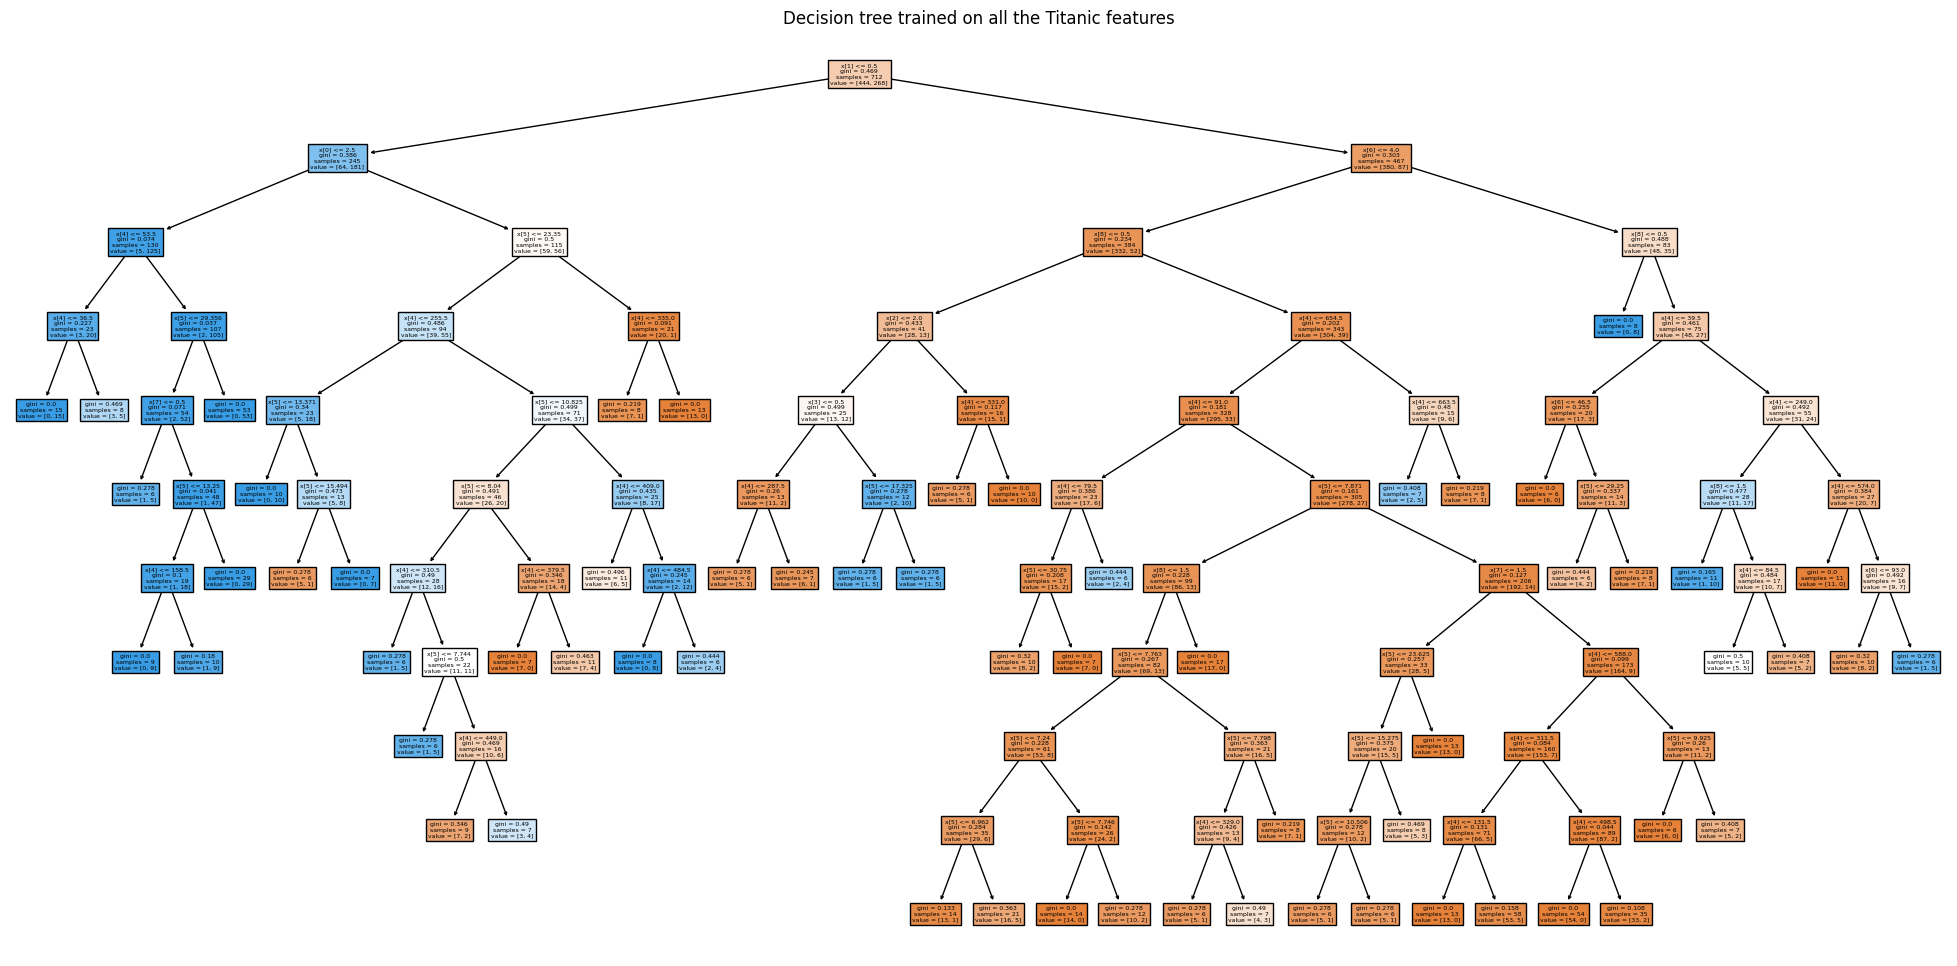

In [30]:
from sklearn.tree import plot_tree

plt.figure()
plt.figure(figsize=(25,12))
plot_tree(best_model, filled=True)
plt.title("Decision tree trained on all the Titanic features")
plt.show()

In [31]:
best_model.feature_importances_

array([0.12482141, 0.44547945, 0.01544474, 0.02616608, 0.1344277 ,
       0.12506414, 0.06620948, 0.00352166, 0.05886534])

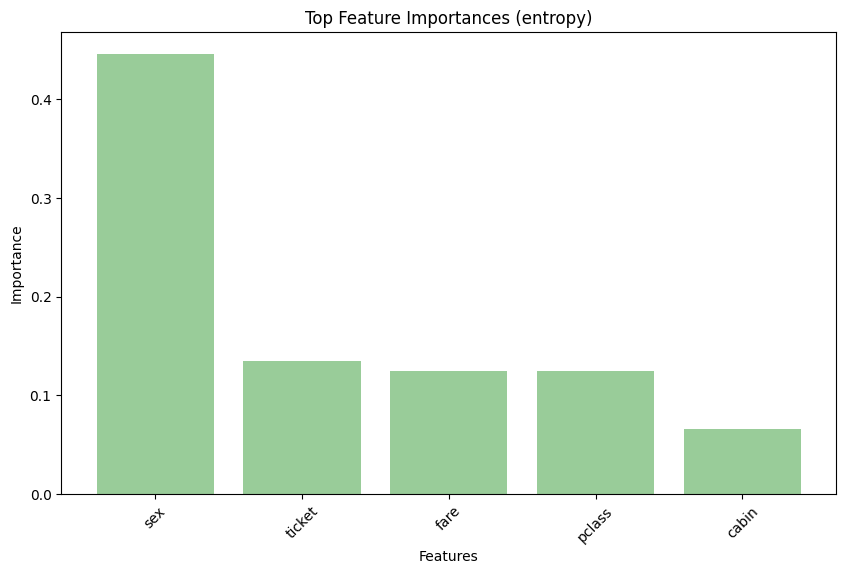

In [32]:
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest()

plt.figure(figsize=(10, 6))
plt.bar(top_features.index, top_features.values, color='green', alpha=0.4)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top Feature Importances (entropy)')
plt.xticks(rotation=45)
plt.show()

<table>
  <tr>
    <td style="font-size: 32px;">Classification Metrics</td>
  </tr>
</table>

<p align="center">
<img src="https://pbs.twimg.com/media/GOHzQIdXQAACOQI?format=jpg&name=medium" width="1000" height="600" border="10"/>
</p>

[image source](https://x.com/mdancho84/status/1792981720649650533?s=52)


$\color{skyblue}{Accuracy}$: the ratio of the number of correct predictions and the total number of predictions. \
$\color{skyblue}{Precell}$ : It explains how many of the correctly predicted cases actually turned out to be positive. \
$\color{skyblue}{Recall (Sensitivity)}$ : It explains how many of the actual positive cases we were able to predict correctly with our model. \
$\color{skyblue}{F1 Score}$ : It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall. \
$\color{skyblue}{ROC}$ : The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’. \
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. From the graph, we simply say the area of the curve ABDE and the X and Y-axis.
<p align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png" width="400" height="300" border="10"/>
</p>


[source](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png) 


## Precision/Recall Trade-off
<p align="left">
<img src="https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/07/un-87.png?resize=1024%2C301&ssl=1" width="600" height="200" border="10"/>
</p>

[source](https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/07/un-87.png?resize=1024%2C301&ssl=1)



# Reviewing Metrics

In [33]:
from sklearn.metrics import  f1_score, roc_auc_score

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print(f"ROC AUC  : {roc_auc:.3f}")

Accuracy : 0.827
Precision: 0.841
Recall   : 0.716
F1 Score : 0.774
ROC AUC  : 0.857


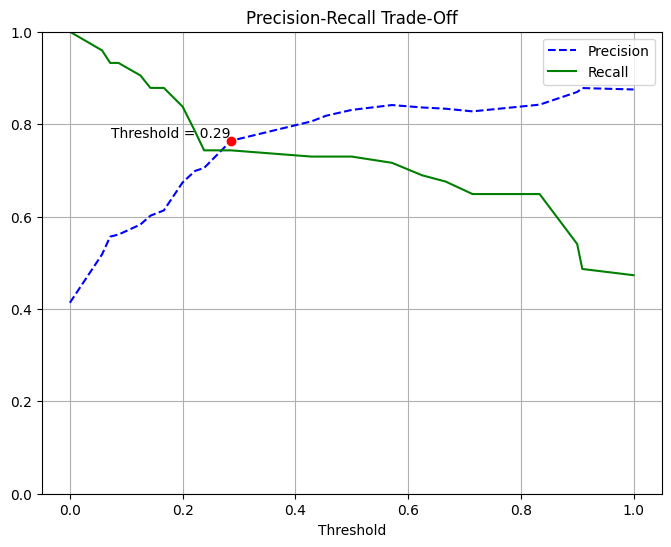

In [34]:
from sklearn.metrics import precision_recall_curve

y_scores = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

intersection_idx = np.argmin(np.abs(precisions - recalls))
intersection_threshold = thresholds[intersection_idx]
intersection_precision = precisions[intersection_idx]
intersection_recall = recalls[intersection_idx]

plt.scatter(intersection_threshold, intersection_precision, color='red', zorder=5)
plt.text(intersection_threshold, intersection_precision, f'Threshold = {intersection_threshold:.2f}', ha='right', va='bottom', color='black')
plt.xlabel("Threshold")
plt.legend(loc="upper right")
plt.ylim([0, 1])
plt.title("Precision-Recall Trade-Off")
plt.grid(True)
plt.show()


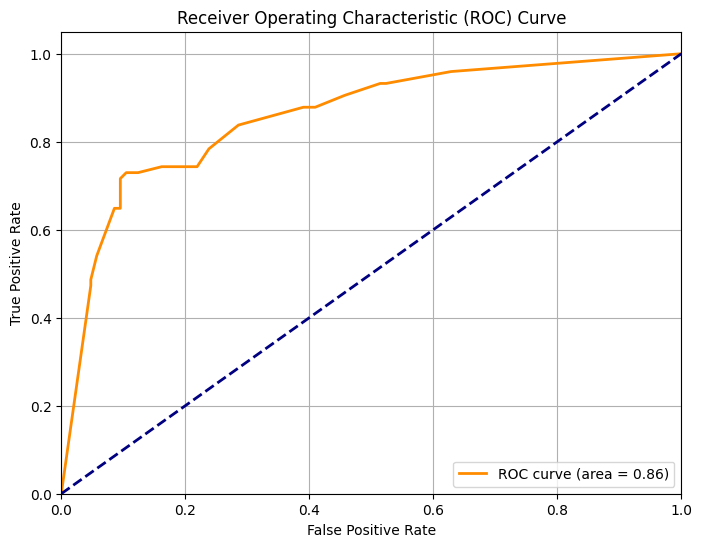

In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [36]:
y_scores.mean(), y_scores.std()

(0.39687482191816614, 0.4070295298172609)

In [37]:
print(y_scores[:10])  
print("Min score:", y_scores.min())
print("Max score:", y_scores.max())


[0.16666667 0.05714286 0.         1.         1.         1.
 0.57142857 0.14285714 0.22222222 1.        ]
Min score: 0.0
Max score: 1.0


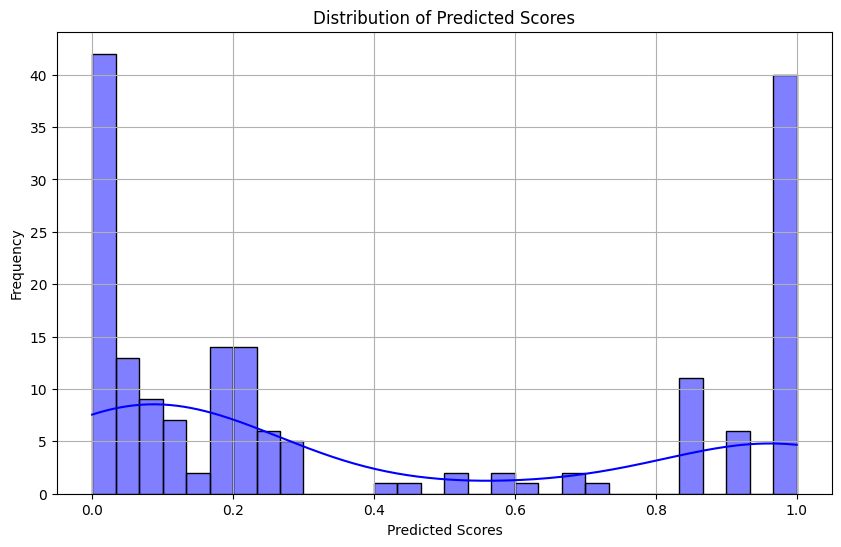

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(y_scores, bins=30, kde=True, color='blue')
plt.xlabel('Predicted Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Scores')
plt.grid(True)
plt.show()


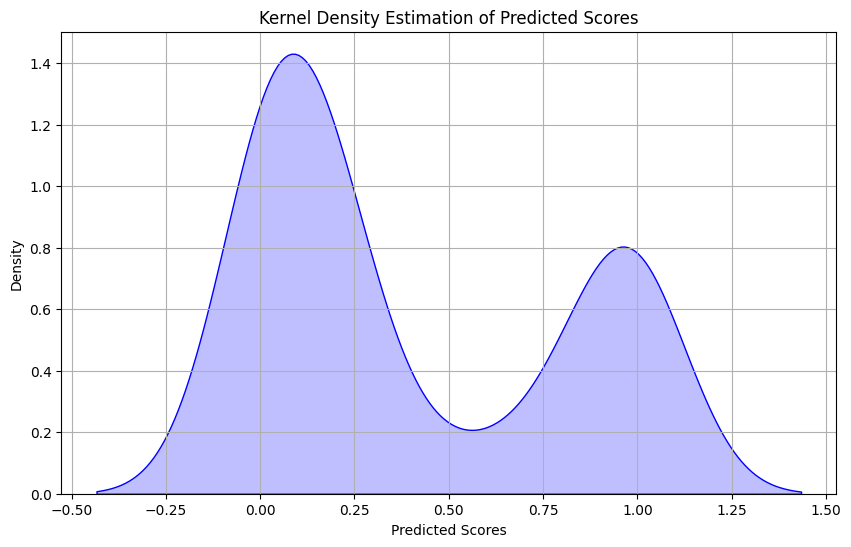

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_scores, color='blue', shade=True)
plt.xlabel('Predicted Scores')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Predicted Scores')
plt.grid(True)
plt.show()

``` Let's look at the scores with different decision thresholds.```

In [40]:
threshold = 0.82  

y_pred_threshold = (y_scores >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
roc_auc = roc_auc_score(y_test, y_scores)

print(f"Threshold: {threshold}")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print(f"ROC AUC  : {roc_auc:.3f}")

Threshold: 0.82
Accuracy : 0.804
Precision: 0.842
Recall   : 0.649
F1 Score : 0.733
ROC AUC  : 0.857


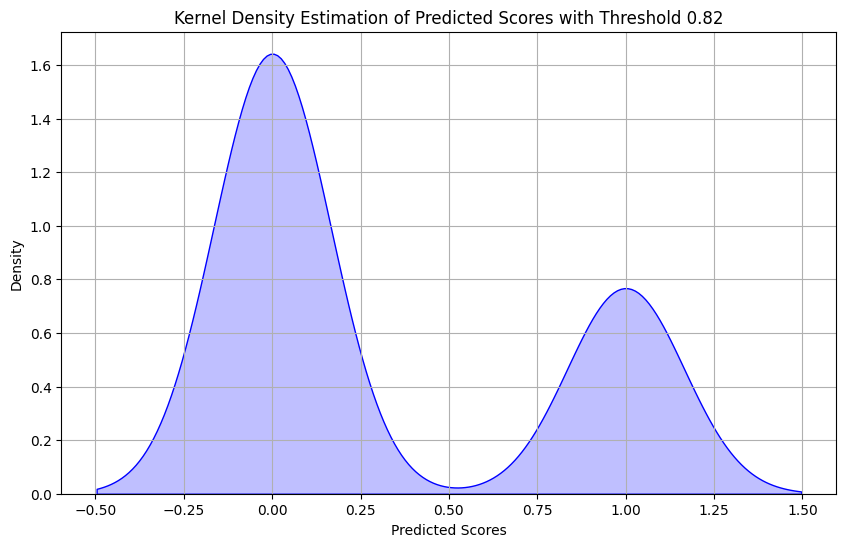

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_threshold, color='blue', shade=True)
plt.xlabel('Predicted Scores')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Predicted Scores with Threshold 0.82')
plt.grid(True)
plt.show()

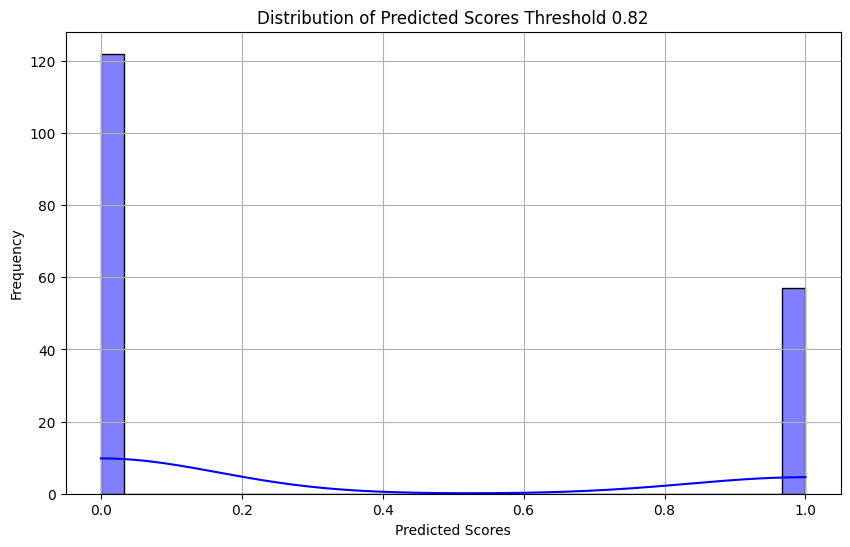

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_threshold, bins=30, kde=True, color='blue')
plt.xlabel('Predicted Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Scores Threshold 0.82')
plt.grid(True)
plt.show()


In [43]:
threshold = 0.29  

y_pred_threshold = (y_scores >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
roc_auc = roc_auc_score(y_test, y_scores)

print(f"Threshold: {threshold}")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")
print(f"ROC AUC  : {roc_auc:.3f}")

Threshold: 0.29
Accuracy : 0.816
Precision: 0.806
Recall   : 0.730
F1 Score : 0.766
ROC AUC  : 0.857


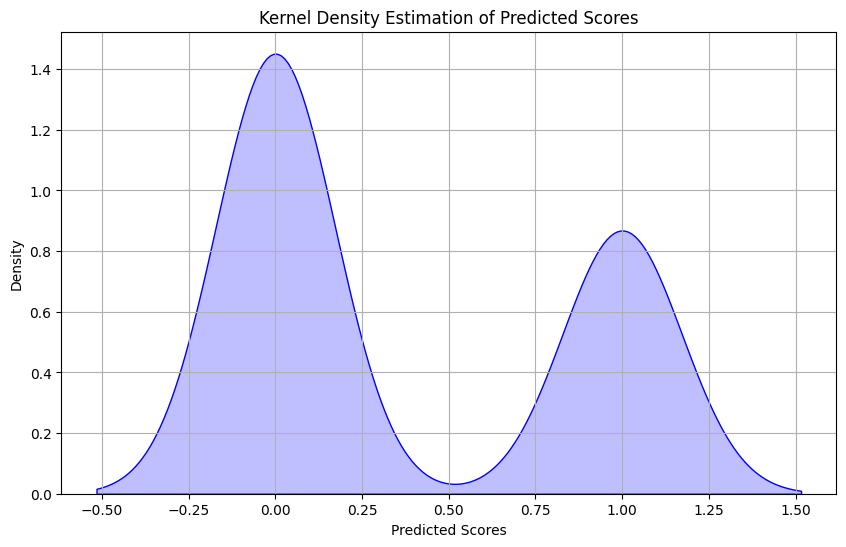

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_threshold, color='blue', shade=True)
plt.xlabel('Predicted Scores')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Predicted Scores')
plt.grid(True)
plt.show()

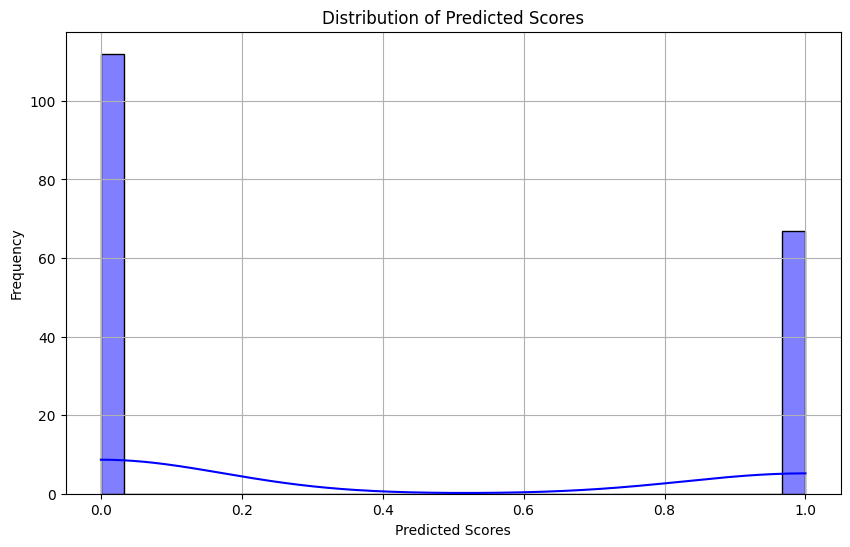

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_threshold, bins=30, kde=True, color='blue')
plt.xlabel('Predicted Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Scores')
plt.grid(True)
plt.show()